# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

The countries with the most projects are:
China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64


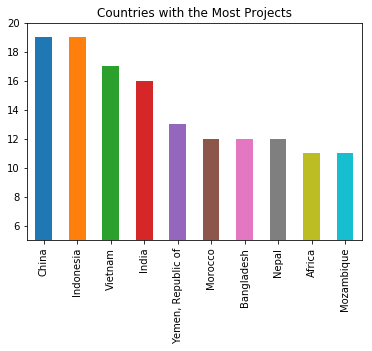

In [8]:
#Read in the Json as a Pandas DataFrame and produce a Series (mostProjects) of counts for the number of projects for each country
json_df = pd.read_json('data/world_bank_projects.json')
mostProjects=json_df.countryshortname.value_counts()[:10]
print('The countries with the most projects are:')
print(mostProjects[:10])
mostProjects.plot(kind='bar', ylim=[5, 20], title= "Countries with the Most Projects")

The most common project themes are:
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64


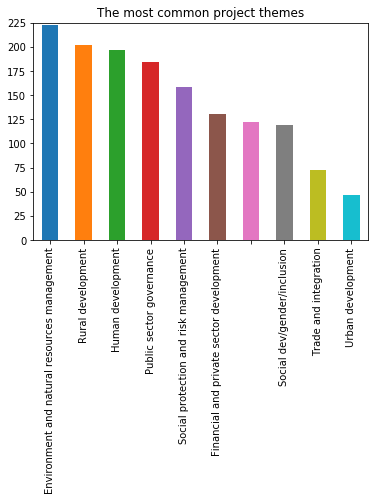

In [9]:
#Create empty list to populate
majorProjects=[]
#Using nested for loops, extract project information from a list of lists of dictionaries.
for line in json_df.mjtheme_namecode:
    for dic in line:
#Populate an empty list (majorProjects), with various project themes using the 'name' key on the dictionary
        majorProjects.append(dic['name'])
#Convert to Series to perform count
majorProjects=pd.Series(majorProjects)
print('The most common project themes are:')
print(majorProjects.value_counts()[:10])
majorProjects.value_counts()[:10].plot(kind='bar', ylim= [0, 225], title= 'The most common project themes')

In [10]:
#Create empty Dict to populate
codeToName= {}
#Using the same bested for loop as before, populate a dictionary with the numeric code of each project as the key and the theme of the project as the value
for line in json_df.mjtheme_namecode:
    for dic in line:
#If statement ensures we do not take an an empty string as a value
        if dic['name']!='':
            codeToName[dic['code']]= dic['name']
#show codeToName to check all pairs are present
codeToName

{u'1': u'Economic management',
 u'10': u'Rural development',
 u'11': u'Environment and natural resources management',
 u'2': u'Public sector governance',
 u'3': u'Rule of law',
 u'4': u'Financial and private sector development',
 u'5': u'Trade and integration',
 u'6': u'Social protection and risk management',
 u'7': u'Social dev/gender/inclusion',
 u'8': u'Human development',
 u'9': u'Urban development'}

In [11]:
#Using the same nested For loop to access the dictionary within the dataframe
for line in json_df.mjtheme_namecode:
    for dic in line:
#Recode the blank strings with their appropriate project names
        if dic['name']=='':
            dic['name']= codeToName[dic['code']]


The most common project themes are:
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64


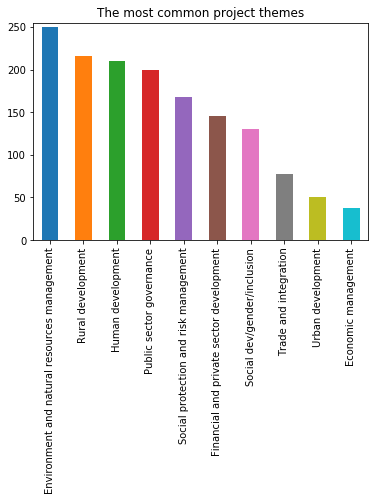

In [14]:
#Create empty list to populate
majorProjects=[]
#Using nested for loops, extract project information from a list of lists of dictionaries.
for line in json_df.mjtheme_namecode:
    for dic in line:
#Populate an empty list (majorProjects), with various project themes using the 'name' key on the dictionary
        majorProjects.append(dic['name'])
#Convert to Series to perform count
majorProjects=pd.Series(majorProjects)
print('The most common project themes are:')
print(majorProjects.value_counts()[:10])
majorProjects.value_counts()[:10].plot(kind='bar', ylim= [0, 255], title= 'The most common project themes')